In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Scrape the data from the website
url = "https://www.valorbuff.com/weapons?mode=2&rank=2&timeframe=4"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [16]:
# Extract the relevant information
data = []
rows = soup.find("table").find("tbody").find_all("tr")
for row in rows:
    cols = row.find_all("td")
    weapon = cols[0].text.strip()
    kills = cols[3].text.strip()
    data.append([weapon, kills])

# Store the data in a pandas DataFrame
df = pd.DataFrame(data, columns=["Weapon", "Kills"])
print(df)


      Weapon  Kills
0     Vandal  46.8%
1    Phantom  12.5%
2    Spectre   8.5%
3      Ghost   6.8%
4    Classic   3.9%
5   Operator   3.4%
6    Sheriff   3.1%
7       Odin   1.5%
8    Marshal   1.4%
9   Guardian   1.4%
10   Bulldog   1.3%
11   Stinger   1.0%
12     Judge   1.0%
13      Ares   0.9%
14    Frenzy   0.8%
15    Shorty   0.4%
16     Bucky   0.4%
17     Knife   0.0%


In [17]:
import requests

url = "https://www.valorbuff.com/weapons?mode=2&rank=2&timeframe=4"
response = requests.get(url)

if response.status_code == 200:
    # Successful request
    data = response.text
else:
    # Request failed
    data = None

soup = BeautifulSoup(response.text, "html.parser")

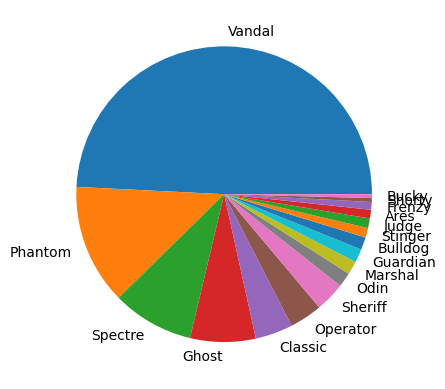

In [18]:
# Extract the relevant information
data = []
rows = soup.find("table").find("tbody").find_all("tr")
for row in rows:
    cols = row.find_all("td")
    weapon = cols[0].text.strip()
    kills = cols[3].text.strip()
    kills = kills
    data.append([weapon, kills])
    
# Store the data in a pandas DataFrame
df = pd.DataFrame(data)
df = df.loc[df[1] != "0.0%"]
df[1] = df[1].str.replace('%', '')
plt.pie(df[1], labels=df[0])
plt.show()